<a href="https://colab.research.google.com/github/Jeymar06/ProyectoIA/blob/main/ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Proyecto IA | FlixGenAI**

*   Jeider Torres Martinez - 2201431
*   Marcos Jose Orjuela Murillo - 2225506



## **Cargar DataSet**

In [148]:
#@title **Librerias**
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import random
from google.colab import drive
from sklearn.svm import SVR
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [149]:
#@title **Conexion Opcional**
# drive.mount('/content/drive')
# df = pd.read_excel("/content/drive/MyDrive/CURSO IA/Netflix Dataset Latest 2021.xlsx")

In [150]:
#@title **Conexion Principal**
github_dataset_url = 'https://github.com/Jeymar06/ProyectoIA/raw/refs/heads/main/Netflix%20Dataset%20Latest%202021.xlsx'

df = pd.read_excel(github_dataset_url)

In [151]:
#@title **Eliminar Valores Nulos**
print(df.isnull().sum())
df = df.dropna()

Title                       0
Genre                      25
Tags                       36
Languages                 170
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64


In [152]:
#@title **Identificar Los Tipos De Datos**
df.dtypes
print('\nLos datos son de tipo\n', df.dtypes)


Los datos son de tipo
 Title                            object
Genre                            object
Tags                             object
Languages                        object
Series or Movie                  object
Hidden Gem Score                float64
Country Availability             object
Runtime                          object
Director                         object
Writer                           object
Actors                           object
View Rating                      object
IMDb Score                      float64
Rotten Tomatoes Score           float64
Metacritic Score                float64
Awards Received                 float64
Awards Nominated For            float64
Boxoffice                       float64
Release Date             datetime64[ns]
Netflix Release Date     datetime64[ns]
Production House                 object
Netflix Link                     object
IMDb Link                        object
Summary                          object
IMDb Votes      

In [153]:
#@title **Datos Finales Procesados**
print(df.count())

Title                    2155
Genre                    2155
Tags                     2155
Languages                2155
Series or Movie          2155
Hidden Gem Score         2155
Country Availability     2155
Runtime                  2155
Director                 2155
Writer                   2155
Actors                   2155
View Rating              2155
IMDb Score               2155
Rotten Tomatoes Score    2155
Metacritic Score         2155
Awards Received          2155
Awards Nominated For     2155
Boxoffice                2155
Release Date             2155
Netflix Release Date     2155
Production House         2155
Netflix Link             2155
IMDb Link                2155
Summary                  2155
IMDb Votes               2155
Image                    2155
Poster                   2155
TMDb Trailer             2155
Trailer Site             2155
dtype: int64


In [154]:
#@title **Tabla De Visualizacion De 5 Filas**
df.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
9,Joker,"Crime, Drama, Thriller","Dark Comedies,Crime Comedies,Dramas,Comedies,C...",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,"Bob Kane, Jerry Robinson, Bill Finger, Todd Ph...",...,2021-03-03,"Bron Studios, Creative Wealth Media Finance, D...",https://www.netflix.com/watch/81382215,https://www.imdb.com/title/tt7286456,A practical jokers fake kidnapping at a bachel...,951938.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BNGVjNW...,https://www.youtube.com/watch?v=t433PEQGErc,YouTube
10,I,"Action, Adventure, Fantasy, Sci-Fi","Dramas,Swedish Movies","English, Sanskrit",Movie,2.8,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,George Lucas,George Lucas,...,2021-03-03,Lucasfilm Ltd.,https://www.netflix.com/watch/81382114,https://www.imdb.com/title/tt0120915,A young man seeking his identity begins a roma...,733336.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BYTRhNj...,https://www.youtube.com/watch?v=bD7bpG-zDJQ,YouTube
11,Harrys Daughters,"Adventure, Drama, Fantasy, Mystery","Dramas,Swedish Movies",English,Movie,4.4,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,David Yates,"Steve Kloves, J.K. Rowling",...,2021-03-03,"Heyday Films, Moving Picture Company, Warner B...",https://www.netflix.com/watch/81382102,https://www.imdb.com/title/tt1201607,"As two sisters both experience pregnancy, trag...",766594.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGVmMW...,https://www.youtube.com/watch?v=5NYt1qirBWg,YouTube
17,The Closet,Comedy,"Korean Movies,Horror Movies,Mysteries",French,Movie,3.8,South Korea,1-2 hour,Francis Veber,Francis Veber,...,2021-03-01,"Miramax, Gaumont",https://www.netflix.com/watch/81405032,https://www.imdb.com/title/tt0243493,A recent widowers move into a new house takes ...,16657.0,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMGRmNz...,https://www.youtube.com/watch?v=ou9YG0fUztA,YouTube


## **Primeros Procesos + Graficas**

### **Matriz De Correlacion**

Es una representación visual de datos que se utiliza para mostrar la variación de la densidad o intensidad de ciertos valores en una matriz bidimensional. Estas gráficas son útiles para identificar patrones, tendencias y anomalías en datos tabulares o matrices.

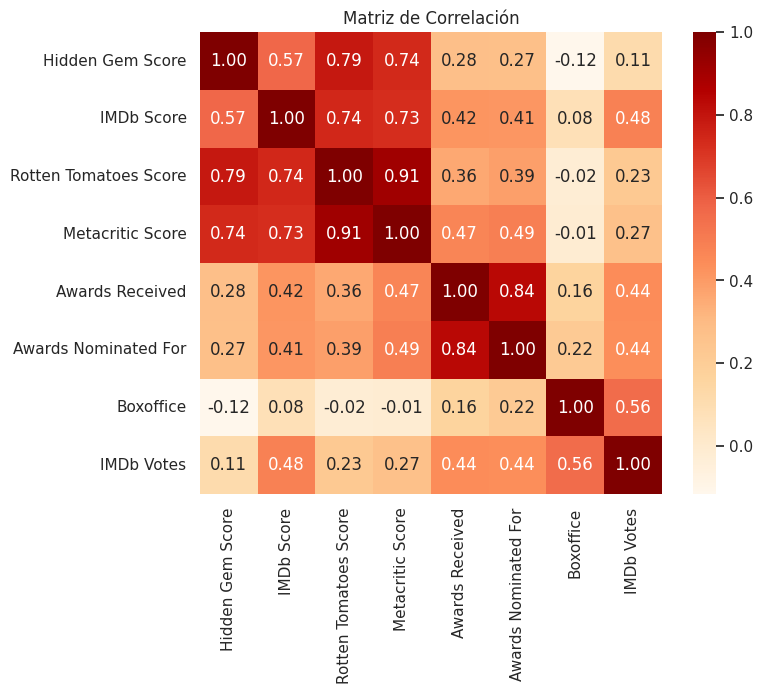

In [155]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()

### **Scatter 3D**

Para visualizar la relación entre dos o más variables en los datos, en este caso los score de los sites web.

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


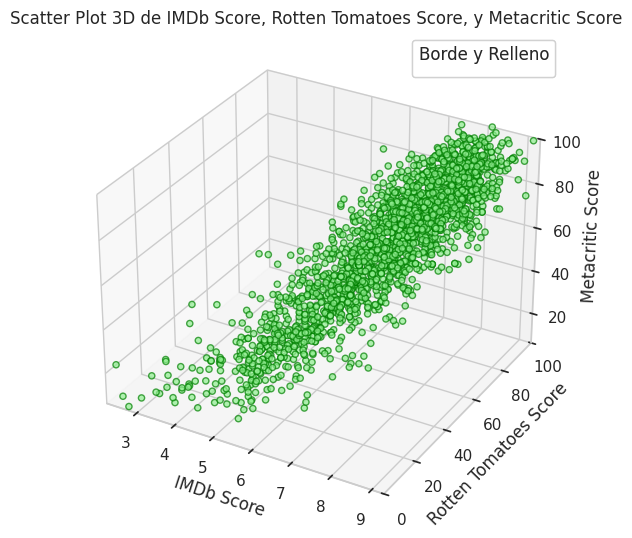

In [156]:
variable_x = 'IMDb Score'
variable_y = 'Rotten Tomatoes Score'
variable_z = 'Metacritic Score'

# Crear el gráfico tridimensional con bordes blancos y relleno de gris claro
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(df[variable_x], df[variable_y], df[variable_z], c='lightgreen', marker='o', alpha=0.7, edgecolor='green', facecolor='gray')

# Establecer los límites de los ejes para que la imagen se muestre completa
ax.set_xlim(min(df[variable_x]), max(df[variable_x]))
ax.set_ylim(min(df[variable_y]), max(df[variable_y]))
ax.set_zlim(min(df[variable_z]), max(df[variable_z]))
ax.set_xlabel(variable_x)
ax.set_ylabel(variable_y)
ax.set_zlabel(variable_z)

plt.title(f'Scatter Plot 3D de {variable_x}, {variable_y}, y {variable_z}')

# Personalizar la leyenda para mostrar el ajuste de borde y relleno
legend1 = ax.legend(*scatter.legend_elements(), title="Borde y Relleno")
ax.add_artist(legend1)
plt.show()

### **Gráfica De Dispersión**

Esta gráfica se utiliza para visualizar la dispersión o distribución conjunta de los datos y para identificar patrones o tendencias en la relación entre las dos variables

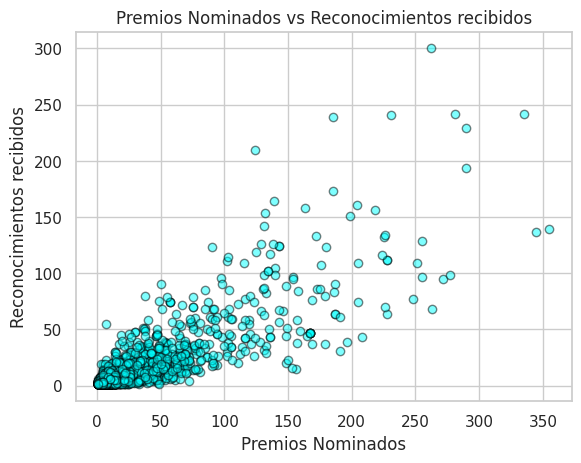

In [157]:
Awards_Nominated_For = df['Awards Nominated For']
Awards_Received = df['Awards Received']

# Crear la gráfica de dispersión
plt.scatter(Awards_Nominated_For, Awards_Received, alpha=0.5, color='aqua', edgecolor='black')

# Personalizar la gráfica
plt.title('Premios Nominados vs Reconocimientos recibidos')
plt.xlabel('Premios Nominados')
plt.ylabel('Reconocimientos recibidos')
plt.show()

### **Medias De Algunas Columnas**

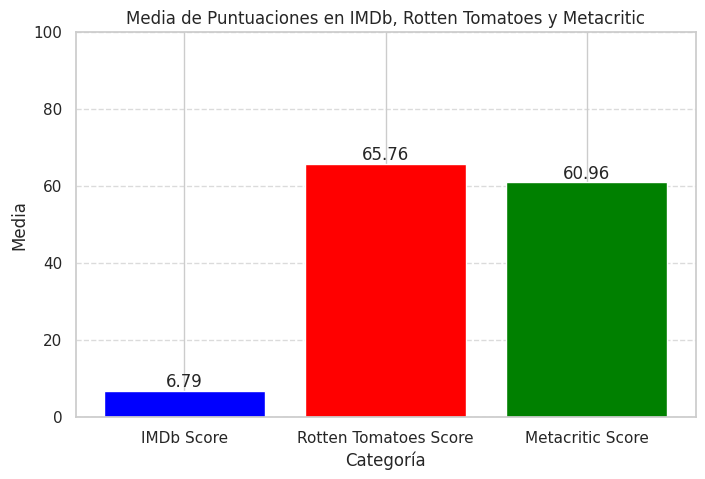

In [158]:
# Calcular las medias
medias = {
    'IMDb Score': df['IMDb Score'].mean(),
    'Rotten Tomatoes Score': df['Rotten Tomatoes Score'].mean(),
    'Metacritic Score': df['Metacritic Score'].mean()
}

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(medias.keys(), medias.values(), color=['blue', 'red', 'green'])

# Agregar etiquetas
plt.xlabel("Categoría")
plt.ylabel("Media")
plt.title("Media de Puntuaciones en IMDb, Rotten Tomatoes y Metacritic")
plt.ylim(0, 100)  # Ajusta según los valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre las barras
for i, v in enumerate(medias.values()):
    plt.text(i, v + 1, f"{v:.2f}", ha='center', fontsize=12)

plt.show()

## **Algunos Modelos de Regresion**

In [159]:
#@title **Reperacion De Datos**

# Crear una nueva columna 'Target' a partir de 'Awards Received' (Premios Ganados)
df['Target'] = df['Awards Received']

# Esto ayuda a reducir la asimetría (distribución sesgada) y mejorar el rendimiento del modelo
df['Awards Nominated For'] = np.log1p(df['Awards Nominated For'])

# Aplicar la misma transformación logarítmica a la variable objetivo 'Target'
df['Target'] = np.log1p(df['Target'])

# Definir las columnas que se escalarán para normalizar sus valores (media = 0, desviación estándar = 1)
cols_to_scale = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score','Awards Nominated For', 'Target']

# Crear un objeto de escalador estándar (z-score scaling)
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [160]:
#@title **Preparacion De Datos Para Procesarlos**

# Definir las características de entrada (variables independientes)
features = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Nominated For']

# Definir la variable objetivo (variable dependiente)
target = 'Target'

# Asignar las variables de entrada y salida
X = df[features]
y = df[target]

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
#@title **MODELO 1: REGRESIÓN LINEAL**

# Crear modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
linear_predictions = linear_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
linear_mse = mean_squared_error(y_test, linear_predictions)

# Calcular R^2 (proporción de varianza explicada)
linear_r2 = r2_score(y_test, linear_predictions)

# Mostrar resultados del modelo lineal
print(f"Linear Regression - MSE: {linear_mse}, R^2: {linear_r2}")

Linear Regression - MSE: 0.3198527487442433, R^2: 0.6869919864992571


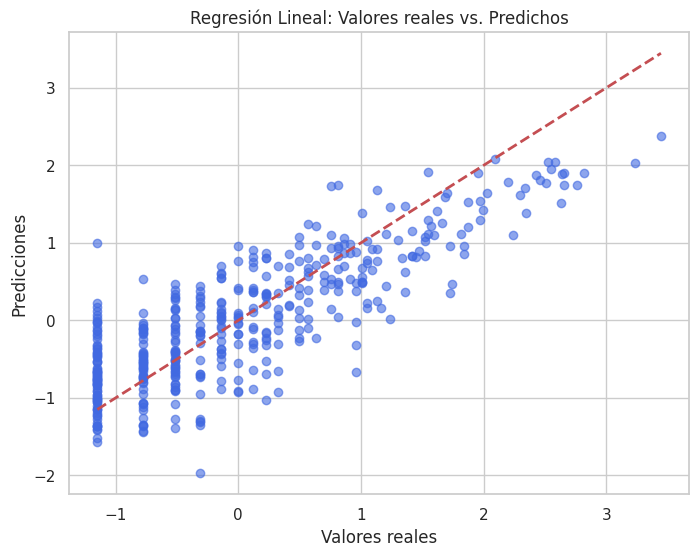

In [162]:
#@title **1.1 Gráfico De Predicciones vs. Valores Reales**

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.show()

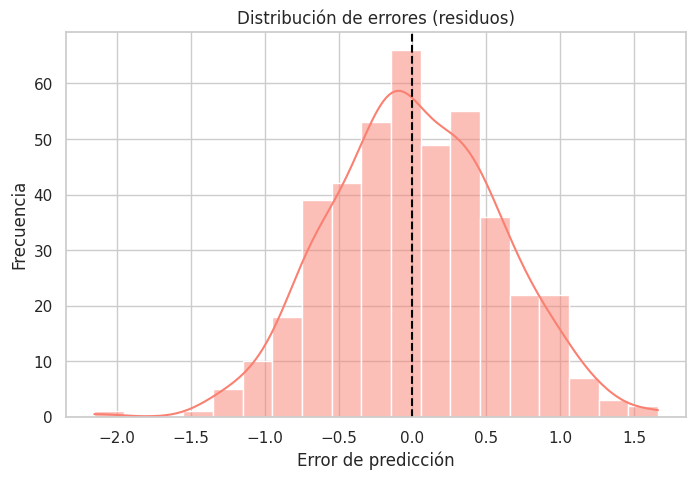

In [163]:
#@title **1.2 Gráfico De Residuos (Errores)**

residuals = y_test - linear_predictions
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='salmon')
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribución de errores (residuos)")
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.show()

In [164]:
#@title **MODELO 2: ÁRBOL DE DECISIÓN**

# Crear modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
tree_predictions = tree_model.predict(X_test)

# Calcular MSE para árbol de decisión
tree_mse = mean_squared_error(y_test, tree_predictions)

# Calcular R^2 para árbol de decisión
tree_r2 = r2_score(y_test, tree_predictions)

# Mostrar resultados del árbol
print(f"Decision Tree - MSE: {tree_mse}, R^2: {tree_r2}")

Decision Tree - MSE: 0.46238519754266466, R^2: 0.5475096814918872


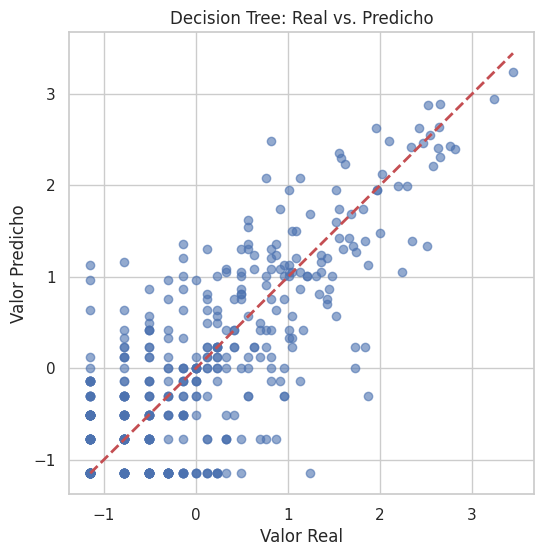

In [165]:
#@title **2.1 Scatter Real vs. Predicho**

plt.figure(figsize=(6,6))
plt.scatter(y_test, tree_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Decision Tree: Real vs. Predicho")
plt.grid(True)
plt.show()

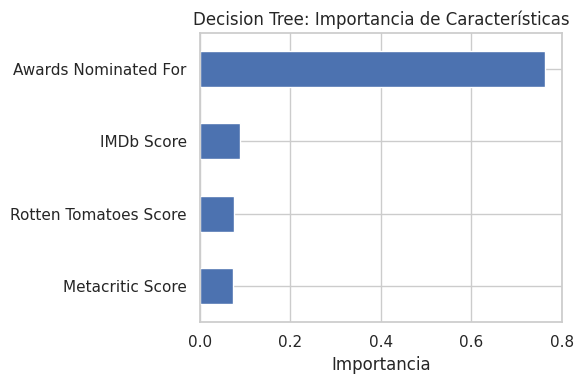

In [166]:
#@title **2.2 Importancia De Características**

feature_importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=True)

plt.figure(figsize=(6,4))
feature_importances.plot(kind='barh')
plt.title("Decision Tree: Importancia de Características")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


In [167]:
#@title **MODELO 3: RANDOM FOREST**

# Crear modelo de bosque aleatorio (Random Forest)
forest_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
forest_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
forest_predictions = forest_model.predict(X_test)

# Calcular MSE del Random Forest
forest_mse = mean_squared_error(y_test, forest_predictions)

# Calcular R^2 del Random Forest
forest_r2 = r2_score(y_test, forest_predictions)

# Mostrar resultados del modelo de bosque aleatorio
print(f"Random Forest - MSE: {forest_mse}, R^2: {forest_r2}")

Random Forest - MSE: 0.28515206385389463, R^2: 0.7209500890551563


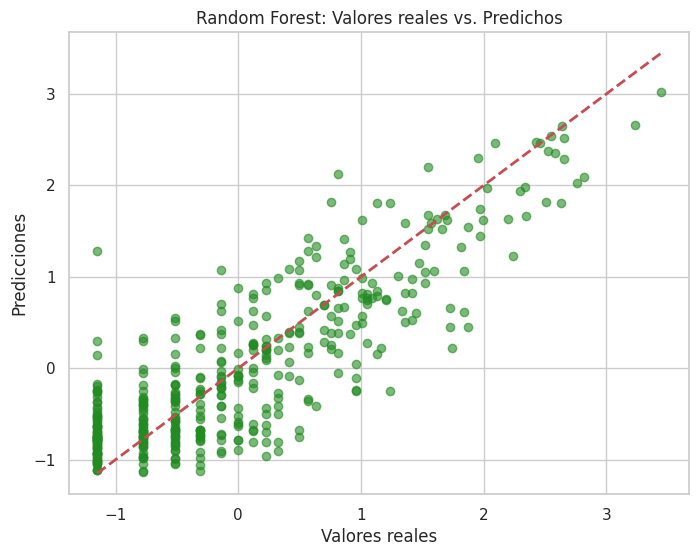

In [168]:
#@title **3.1 Gráfico de Valores Reales vs. Predicciones**

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, forest_predictions, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Random Forest: Valores reales vs. Predichos")
plt.show()

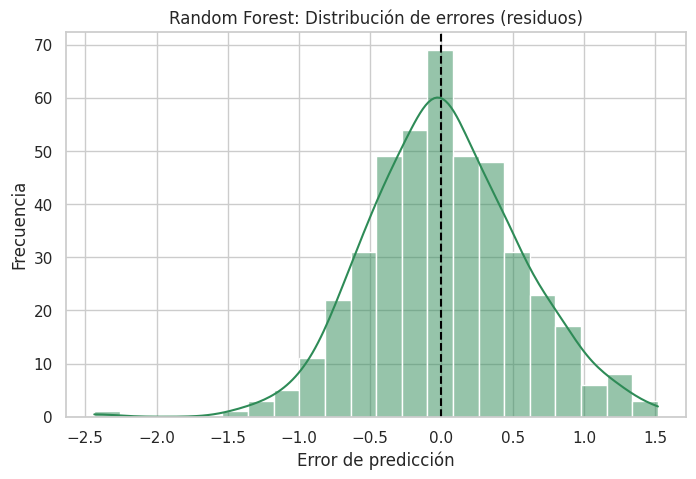

In [169]:
#@title **3.2  Histograma De Residuos (Errores)**

residuals_rf = y_test - forest_predictions

plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, kde=True, color='seagreen')
plt.axvline(0, color='black', linestyle='--')
plt.title("Random Forest: Distribución de errores (residuos)")
plt.xlabel("Error de predicción")
plt.ylabel("Frecuencia")
plt.show()

In [170]:
#@title **MODELO 4: GRADIENT BOOSTING**

# Creamos el modelo de Gradient Boosting con un valor fijo de aleatoriedad para reproducibilidad
gbr_model = GradientBoostingRegressor(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
gbr_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
gbr_predictions = gbr_model.predict(X_test)

# Calculamos el error cuadrático medio (MSE) para saber qué tanto se equivoca el modelo
gbr_mse = mean_squared_error(y_test, gbr_predictions)

# Calculamos R², que nos indica qué porcentaje de la variabilidad en los datos explica el modelo
gbr_r2 = r2_score(y_test, gbr_predictions)

# Mostramos los resultados
print(f"Gradient Boosting - MSE: {gbr_mse}, R^2: {gbr_r2}")

Gradient Boosting - MSE: 0.2635599199496599, R^2: 0.742080168747205


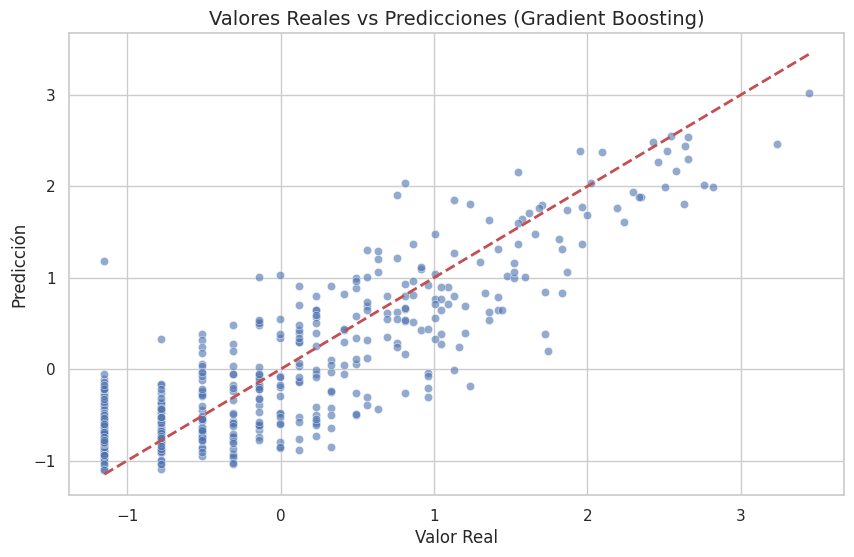

In [171]:
#@title **4.1 Gráfico de Valores Reales vs. Predicciones**

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gbr_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Valores Reales vs Predicciones (Gradient Boosting)', fontsize=14)
plt.xlabel('Valor Real', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.grid(True)
plt.show()

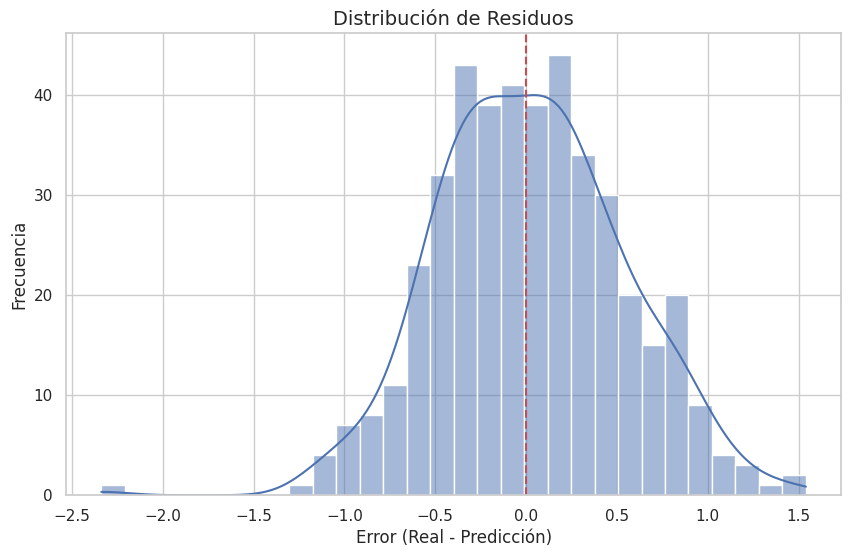

In [172]:
#@title **4.2  Histograma De Residuos (Errores)**

residuos = y_test - gbr_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.title('Distribución de Residuos', fontsize=14)
plt.xlabel('Error (Real - Predicción)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()


## **Modelos De Clasificacion Supervisada**

In [173]:
#@title **Preparacion Para Implementar Los Modelos**

df_classification = df.copy()

# Crear un array temporal de ceros con las dimensiones correctas
dummy_array = np.zeros((df_classification['Target'].shape[0], len(cols_to_scale)))

# Poner los valores escalados de 'Target' en la columna correspondiente
dummy_array[:, cols_to_scale.index('Target')] = df_classification['Target']

# Desescalar el array completo
descaled_array = scaler.inverse_transform(dummy_array)

# Extraer la columna de 'Target' desescalada
df_classification['Awards Received_OriginalScale'] = descaled_array[:, cols_to_scale.index('Target')]

# Deshacer la transformación logarítmica (np.log1p se deshace con np.expm1)
df_classification['Awards Received_Original'] = np.expm1(df_classification['Awards Received_OriginalScale'])

# Definir el umbral para la clasificación binaria
median_awards = df_classification['Awards Received_Original'].median()
print(f"La mediana de 'Awards Received' es: {median_awards:.2f}")

# 1 si la película recibió más premios que la mediana, 0 en caso contrario
df_classification['Awards_Category'] = (df_classification['Awards Received_Original'] > median_awards).astype(int)

# Verificar el balance de clases
print("\nConteo de clases en 'Awards_Category':")
print(df_classification['Awards_Category'].value_counts())
print(f"Porcentaje de clase 0: {df_classification['Awards_Category'].value_counts(normalize=True)[0]:.2f}")
print(f"Porcentaje de clase 1: {df_classification['Awards_Category'].value_counts(normalize=True)[1]:.2f}")

# Usamos las 'features' ya escaladas del df original
X_cls = df_classification[features]

# La nueva variable objetivo categórica
y_cls = df_classification['Awards_Category']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%) para clasificación
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

La mediana de 'Awards Received' es: 4.00

Conteo de clases en 'Awards_Category':
Awards_Category
0    1078
1    1077
Name: count, dtype: int64
Porcentaje de clase 0: 0.50
Porcentaje de clase 1: 0.50


In [174]:
#@title **MODELO 1: Regresion Logistica**

# Crear modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=42, solver='liblinear')

# Entrenar el modelo
logistic_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
logistic_predictions = logistic_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test_cls, logistic_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, logistic_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, logistic_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, logistic_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, logistic_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, logistic_predictions))


--- Regresión Logística ---
Accuracy: 0.8283
Precision: 0.8439
Recall: 0.8047
F1-Score: 0.8238

Matriz de Confusión:
 [[184  32]
 [ 42 173]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       216
           1       0.84      0.80      0.82       215

    accuracy                           0.83       431
   macro avg       0.83      0.83      0.83       431
weighted avg       0.83      0.83      0.83       431



In [175]:
#@title **MODELO 2: Arbol De Decision**

# Crear modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
dt_predictions = dt_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Árboles de Decisión ---")
print(f"Accuracy: {accuracy_score(y_test_cls, dt_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, dt_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, dt_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, dt_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, dt_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, dt_predictions))


--- Árboles de Decisión ---
Accuracy: 0.7773
Precision: 0.7931
Recall: 0.7488
F1-Score: 0.7703

Matriz de Confusión:
 [[174  42]
 [ 54 161]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       216
           1       0.79      0.75      0.77       215

    accuracy                           0.78       431
   macro avg       0.78      0.78      0.78       431
weighted avg       0.78      0.78      0.78       431



In [176]:
#@title **MODELO 3: Random Forest**

# Crear modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo
rf_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
rf_predictions = rf_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test_cls, rf_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, rf_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, rf_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, rf_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, rf_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, rf_predictions))


--- Random Forest Classifier ---
Accuracy: 0.8306
Precision: 0.8550
Recall: 0.7953
F1-Score: 0.8241

Matriz de Confusión:
 [[187  29]
 [ 44 171]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       216
           1       0.85      0.80      0.82       215

    accuracy                           0.83       431
   macro avg       0.83      0.83      0.83       431
weighted avg       0.83      0.83      0.83       431



In [177]:
#@title **MODELO 4: Gradient Boosting**

# Crear modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Entrenar el modelo
gb_model.fit(X_train_cls, y_train_cls)

# Predecir sobre los datos de prueba
gb_predictions = gb_model.predict(X_test_cls)

# Evaluar el modelo
print("\n--- Gradient Boosting Classifier ---")
print(f"Accuracy: {accuracy_score(y_test_cls, gb_predictions):.4f}")
print(f"Precision: {precision_score(y_test_cls, gb_predictions):.4f}")
print(f"Recall: {recall_score(y_test_cls, gb_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_cls, gb_predictions):.4f}")
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_cls, gb_predictions))
print("\nReporte de Clasificación:\n", classification_report(y_test_cls, gb_predictions))


--- Gradient Boosting Classifier ---
Accuracy: 0.8237
Precision: 0.8840
Recall: 0.7442
F1-Score: 0.8081

Matriz de Confusión:
 [[195  21]
 [ 55 160]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       216
           1       0.88      0.74      0.81       215

    accuracy                           0.82       431
   macro avg       0.83      0.82      0.82       431
weighted avg       0.83      0.82      0.82       431



### **Analisis**

| Modelo                     | Accuracy | Precision | Recall | F1-Score |
|----------------------------|----------|-----------|--------|----------|
| Regresión Logística        | 0.8283   | 0.8439    | 0.8047 | 0.8238   |
| Árboles de Decisión        | 0.7773   | 0.7931    | 0.7488 | 0.7703   |
| Random Forest Classifier   | **0.8306** | **0.8550**| 0.7953 | **0.8241** |
| Gradient Boosting Classifier| 0.8237   | 0.8840    | **0.7442** | 0.8081   |


El Random Forest Classifier es el modelo más equilibrado y con mejor rendimiento general, destacando en Accuracy (0.8306) y F1-Score (0.8241). Ofrece una alta Precision (0.8550), lo que significa que sus predicciones positivas son muy fiables.

La Regresión Logística es una alternativa fuerte, con métricas muy similares y un Recall ligeramente superior (0.8047). El Gradient Boosting Classifier muestra la Precision más alta (0.8840), pero con un Recall más bajo (0.7442), indicando que es muy preciso cuando predice positivo, pero puede pasar por alto más casos reales.

El modelo de Árboles de Decisión fue el de menor rendimiento (Accuracy: 0.7773) y el menos recomendado para este análisis.

En conclusion Random Forest Classifier es la mejor opción para este problema, balanceando efectivamente todas las métricas.

## **Modelos De Clasificacion No Supervisada**




In [178]:
#@title **Preparacion Para Implementar Los Modelos**

# Selecciona las características que se usarán para el clustering
features = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Hidden Gem Score']
X = df[features].values

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convierte los datos escalados de nuevo a un DataFrame para facilitar la selección por nombre de columna
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nPrimeras 5 filas de X_scaled_df después del preprocesamiento y escalado:")
print(X_scaled_df.head())
print(f"Dimensiones de los datos escalados (X_scaled): {X_scaled.shape}")

# Define los índices de las características para la visualización
feature1_name = 'IMDb Score'
feature2_name = 'Rotten Tomatoes Score'
feature1_idx = features.index(feature1_name)
feature2_idx = features.index(feature2_name)


Primeras 5 filas de X_scaled_df después del preprocesamiento y escalado:
   IMDb Score  Rotten Tomatoes Score  Metacritic Score  Hidden Gem Score
0    1.223868               1.279736          1.243185          0.828355
1    1.774435               0.088946         -0.115876          0.094763
2   -0.317719              -0.546143         -0.588593         -0.547131
3    1.444094               1.200350          1.420454          0.920054
4    0.232848               0.763727          0.652289          0.369860
Dimensiones de los datos escalados (X_scaled): (2155, 4)


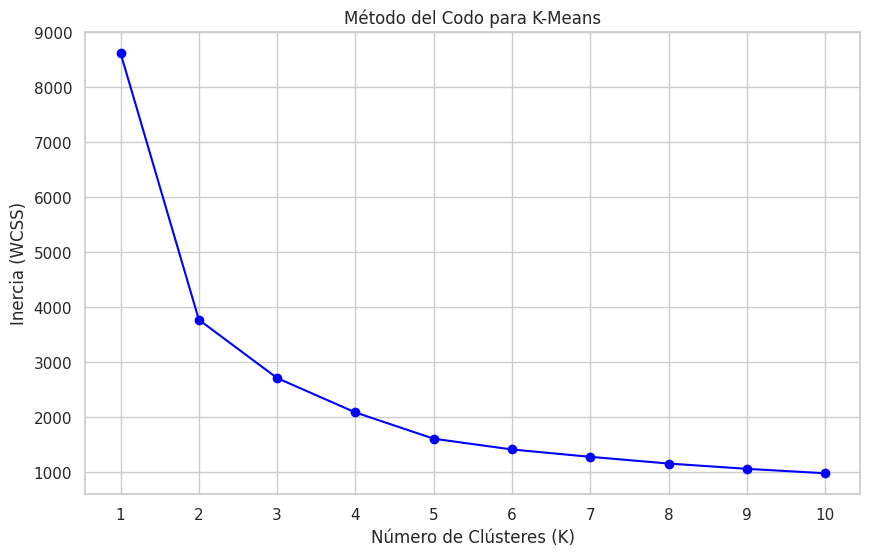

In [179]:
#@title **Método Del Codo Para K-Means**

# Lista para almacenar la suma de los cuadrados de las distancias (Inercia)
wcss = []

# Rango de valores de K a probar (de 1 a 10)
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # La inercia es la suma de los cuadrados de las distancias al centroide

# --- Visualización del Método del Codo ---
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Conteo de elementos por clúster (K-Means con K = 4):
KMeans_Cluster
0    844
1    801
2    417
3     93
Name: count, dtype: int64


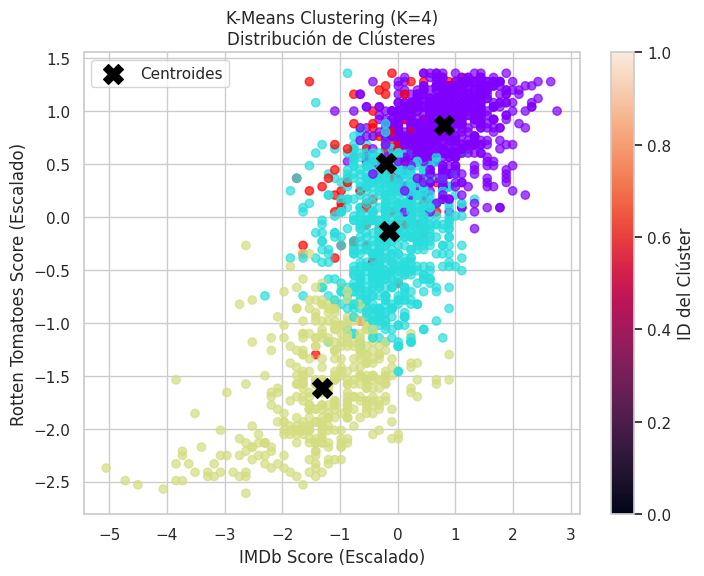

Dimensiones de los centroides de K-Means: (4, 4)


In [180]:
#@title **MODELO 1: K-Means Clustering**

# Define el número óptimo de clústeres (basado en la gráfica del codo)
optimal_k_kmeans = 4

# Inicializa y entrena el modelo K-Means
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
df['KMeans_Cluster'] = kmeans_model.labels_
print(f"Conteo de elementos por clúster (K-Means con K = {optimal_k_kmeans}):")
print(df['KMeans_Cluster'].value_counts())

# --- Visualización para K-Means ---
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, feature1_idx], X_scaled[:, feature2_idx],
            c=df['KMeans_Cluster'], cmap='rainbow', alpha=0.7)
plt.scatter(kmeans_model.cluster_centers_[:, feature1_idx],
            kmeans_model.cluster_centers_[:, feature2_idx],
            s=200, c='black', marker='X', label='Centroides')
plt.title(f'K-Means Clustering (K={optimal_k_kmeans})\nDistribución de Clústeres')
plt.xlabel(f'{feature1_name} (Escalado)')
plt.ylabel(f'{feature2_name} (Escalado)')
plt.legend()
plt.grid(True)
plt.colorbar(label='ID del Clúster')
plt.show()

print("Dimensiones de los centroides de K-Means:", kmeans_model.cluster_centers_.shape)

Conteo de elementos por clúster (DBSCAN):
DBSCAN_Cluster
 0    2014
-1     119
 2       6
 1       6
 4       5
 3       5
Name: count, dtype: int64


<ipython-input-181-7aa3eaa28b60>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('rainbow', len(unique_labels))


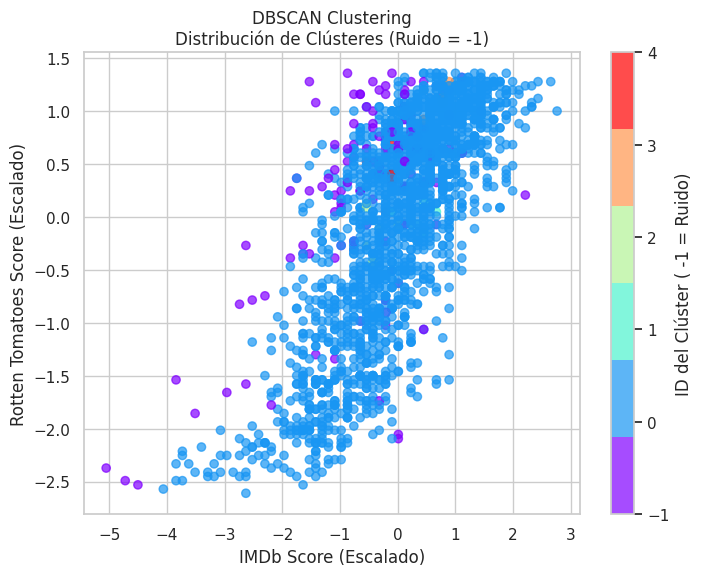

In [181]:
#@title **MODELO 2: DBSCAN Clustering**

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_scaled)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
df['DBSCAN_Cluster'] = dbscan_model.labels_
print("Conteo de elementos por clúster (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())

# --- Visualización para DBSCAN ---
plt.figure(figsize=(8, 6))
unique_labels = np.unique(df['DBSCAN_Cluster'])
colors = plt.cm.get_cmap('rainbow', len(unique_labels))

plt.scatter(X_scaled[:, feature1_idx], X_scaled[:, feature2_idx],
            c=df['DBSCAN_Cluster'], cmap=colors, alpha=0.7)
plt.title('DBSCAN Clustering\nDistribución de Clústeres (Ruido = -1)')
plt.xlabel(f'{feature1_name} (Escalado)')
plt.ylabel(f'{feature2_name} (Escalado)')
plt.grid(True)
plt.colorbar(label='ID del Clúster ( -1 = Ruido)')
plt.show()

Conteo de elementos por clúster (Agglomerative con K = 4):
Agglomerative_Cluster
0    1152
2     532
1     364
3     107
Name: count, dtype: int64


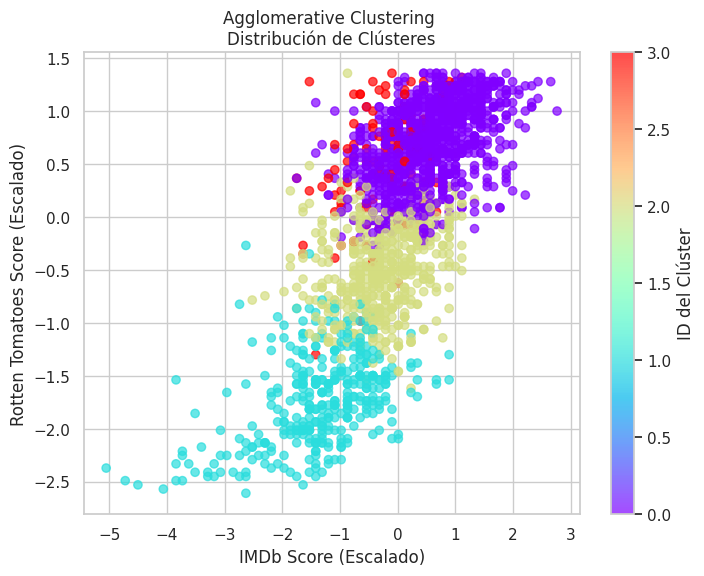

In [182]:
#@title **MODELO 3: Agglomerative Clustering**

n_clusters_agglomerative = 4

# Inicializa y entrena el modelo Agglomerative Clustering
agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters_agglomerative, linkage='ward')
agglomerative_model.fit(X_scaled)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
df['Agglomerative_Cluster'] = agglomerative_model.labels_

print(f"Conteo de elementos por clúster (Agglomerative con K = {n_clusters_agglomerative}):")
print(df['Agglomerative_Cluster'].value_counts())

# --- Visualización para Agglomerative Clustering ---
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, feature1_idx], X_scaled[:, feature2_idx],
            c=df['Agglomerative_Cluster'], cmap='rainbow', alpha=0.7)
plt.title(f'Agglomerative Clustering \nDistribución de Clústeres')
plt.xlabel(f'{feature1_name} (Escalado)')
plt.ylabel(f'{feature2_name} (Escalado)')
plt.grid(True)
plt.colorbar(label='ID del Clúster')
plt.show()


<ipython-input-183-b45471bf2830>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


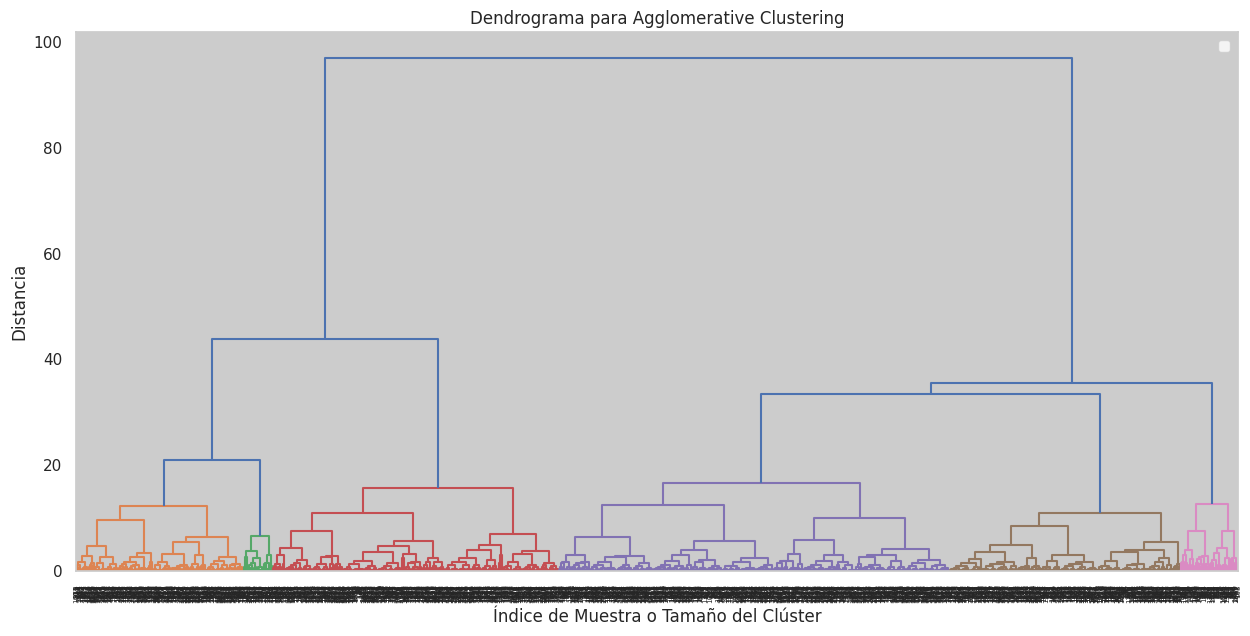

In [183]:
#@title **Generación Del Dendrograma Para Agglomerative Clustering**

# Genera la matriz de enlace
linked = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(15, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=20,

)
plt.title('Dendrograma para Agglomerative Clustering')
plt.xlabel('Índice de Muestra o Tamaño del Clúster')
plt.ylabel('Distancia')
plt.legend()
plt.show()